In [1]:
%config InlineBackend.figure_formats = ['svg']
from quimb.experimental import schematic

# Illustrative example

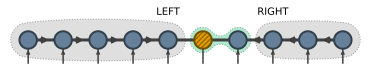

In [2]:
presets = {
    'bond': {'linewidth': 3},
    'phys': {'linewidth': 1.5},
    'center': {
        'color': schematic.get_wong_color('orange'),
        'hatch': '/////',
    }
}

d = schematic.Drawing(presets=presets)

L = 10
center = 5

for i in range(10):
    # draw tensor
    d.circle((i, 0), preset="center" if i == center else None)
    
    # draw physical index
    d.line((i, 0), (i, -2/3), preset='phys')
    
    # draw virtual bond
    if i + 1 < L:
        d.line((i, 0), (i + 1, 0), preset='bond')
        
    # draw isometric conditions
    if i != center:
        d.arrowhead((i, -2/3), (i, 0), preset='phys')
    if i < center - 1:
        d.arrowhead((i, 0), (i + 1, 0), preset='bond')
    if i > center + 1:
        d.arrowhead((i, 0), (i - 1, 0), preset='bond')
    
# label the left
if center > 0:
    d.text((center - 1, 0.8), 'LEFT')
    d.patch_around([(i, 0) for i in range(center)], radius=0.5)
    
# label pair
if center + 1 < L:
    d.patch_around_circles(
        (center, 0), 0.3,
        (center + 1, 0), 0.3,
        facecolor=(.2, .8, .5, .4),
    )
    
# label the right
if center + 2 < L:
    d.text((center + 2, 0.8), 'RIGHT')
    d.patch_around([(i, 0) for i in range(center + 2, L)], radius=0.5)

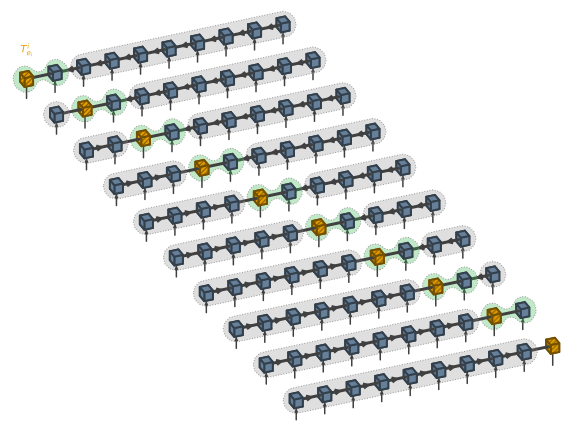

In [3]:
d = schematic.Drawing(presets=presets, figsize=(10, 10))

L = 10

radius = 0.15

for center in range(L):
    # map the stage into a 3D x-coordinate
    x = 2 * center
    
    for i in range(10):
        # draw tensor, can now use cube rather than circle
        d.cube((x, i, 0), radius=radius, preset="center" if i == center else None)

        # draw physical index
        d.line((x, i, 0), (x, i, -2/3), preset='phys')

        # draw virtual bond
        if i + 1 < L:
            d.line((x, i + radius, 0), (x, i + 1 - radius, 0), preset='bond')

        # draw isometric conditions
        if i != center:
            d.arrowhead((x, i, -2/3), (x, i, 0), preset='phys')
        if i < center - 1:
            d.arrowhead((x, i, 0), (x, i + 1, 0), preset='bond')
        if i > center + 1:
            d.arrowhead((x, i, 0), (x, i - 1, 0), preset='bond')

    # label the left
    if center > 0:
        d.patch_around([(x, i, 0) for i in range(center)], radius=3 * radius, smoothing=0.0)

    # label pair
    if center + 1 < L:
        d.patch_around_circles(
            (x, center, 0), 2.5 * radius,
            (x, center + 1, 0), 2.5 * radius,
            facecolor=(.2, .7, .3, .3),
        )

    # label the right
    if center + 2 < L:
        d.patch_around([(x, i, 0) for i in range(center + 2, L)], radius=3 * radius, smoothing=0.0)
        
d.text((0, 0, 1), '$T^i_{e_i}$', color=schematic.get_wong_color('orange'))

# Individual elements:

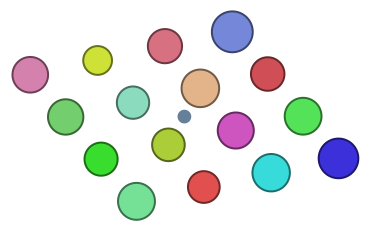

In [4]:
import numpy as np
from quimb.tensor.drawing import hash_to_color

d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.circle(
        coo, 
        radius=np.random.uniform(0.2, 0.3),
        color=hash_to_color(str(coo))
    )
    
# dot is a simple alias circle
d.dot((1.5, 1.5, 0))

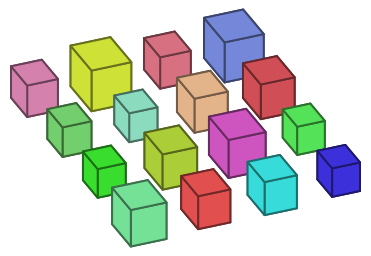

In [5]:
import numpy as np
from quimb.tensor.drawing import hash_to_color

d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.cube(
        coo, 
        radius=np.random.uniform(0.2, 0.3),
        color=hash_to_color(str(coo))
    )

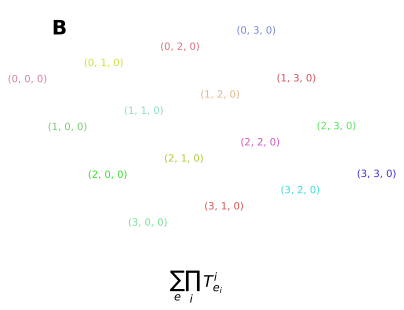

In [6]:
d = schematic.Drawing()

coos = [
    (i, j, 0)
    for i in range(4)
    for j in range(4)
]

for coo in coos:
    d.text(
        coo, str(coo),
        color=hash_to_color(str(coo))
    )
    
# labels are the same but use the axes of figure coordinates
d.label_ax(0.1, 0.9, '$\\mathbf{B}$', fontsize=20)
d.label_fig(0.5, 0.0, '$\\sum_e \\prod_i ~ T^i_{e_i}$', fontsize=16)

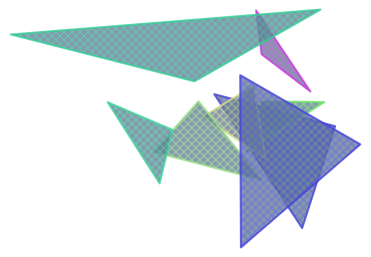

In [7]:
d = schematic.Drawing()

rng = np.random.default_rng(1)
pts = rng.normal(size=(8, 3, 3))

for coos in pts:
    d.shape(coos, alpha=0.8, hatch='XXX', edgecolor=hash_to_color(str(coos)))

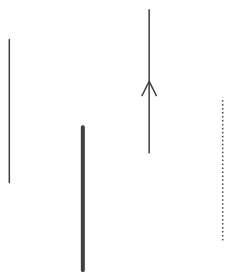

In [8]:
d = schematic.Drawing()

d.line((0, 0, 0), (0, 0, 1))
d.line((0, 1, 0), (0, 1, 1), arrowhead=True)
d.line((1, 0, 0), (1, 0, 1), linewidth=4)
d.line((1, 1, 0), (1, 1, 1), linestyle=':')

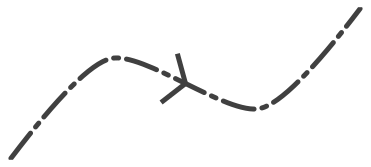

In [9]:
d = schematic.Drawing()

d.curve(
    [(0, 0), (1, 1), (2.5, 0.5), (3.5, 1.5)], 
    linestyle='-.', linewidth=5,
)

# you can draw just the arrowhead
d.arrowhead((1, 1), (2.5, 0.5), linewidth=5, width=0.15)

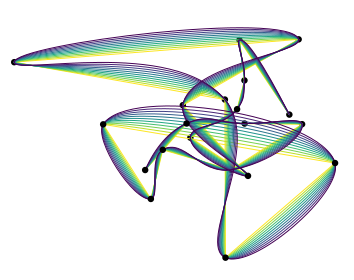

In [10]:
import matplotlib as mpl
cm = mpl.colormaps.get_cmap('viridis_r')

d = schematic.Drawing()

rng = np.random.default_rng(1)
pts = rng.normal(size=(20, 3))

for pt in pts:
    d.dot(pt, color='black', radius=0.05)

for smoothing in np.linspace(0.0, 1.0, 11):
    d.curve(pts, smoothing=smoothing, color=cm(smoothing))

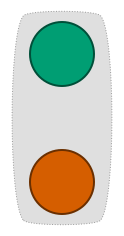

In [16]:
d = schematic.Drawing(figsize=(4, 4))

d.circle((0, 0), color=schematic.get_wong_color('red'))
d.circle((0, 1), color=schematic.get_wong_color('green'))
d.patch([
    (-.3, -.3),
    (+.3, -.3),
    (+.3, +1.3),
    (-.3, +1.3),
], smoothing=0.3)

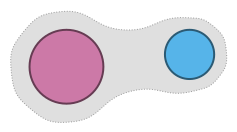

In [15]:
d = schematic.Drawing(figsize=(4, 4))

d.circle((0, 0), radius=3, color=schematic.get_wong_color('pink'))
d.circle((10, 1), radius=2, color=schematic.get_wong_color('blue'))

d.patch_around_circles(
    (0, 0), 3,
    (10, 1), 2,
    padding=0.5,
)

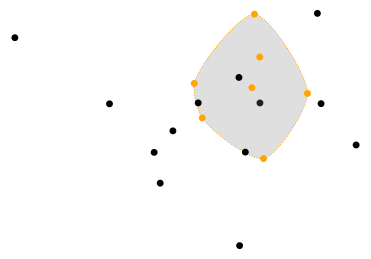

In [13]:
d = schematic.Drawing()

for pt in pts[:7]:
    d.dot(pt, color='orange', radius=0.05)
for pt in pts[7:]:
    d.dot(pt, color='black', radius=0.05)

d.patch_around(pts[:7], edgecolor='orange')

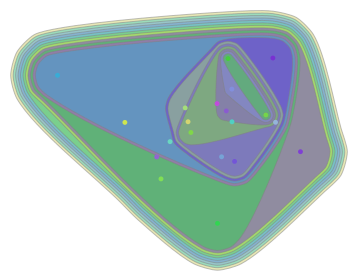

In [14]:
d = schematic.Drawing()

for k, pt in enumerate(pts):
    d.dot(pt, color=hash_to_color(str(k)), radius=0.05)

for k in range(1, len(pts)):
    d.patch_around(
        pts[:k], 
        radius=0.05 * k, 
        facecolor=hash_to_color(str(k - 1)),
        linestyle='-',
        zorder=-k,
        alpha=0.5,
    )